# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 8 de mayo de 2023__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [ ]:
RANDOM_STATE = 1234

# Apartado 1: Análisis de sentimientos


__Número de grupo: 31__

__Nombres de los estudiantes: Miguel Antonio Amato Hermo y Alejandro Tobías Ángeles__

## 1) Carga del conjunto de datos

El fichero `IMBD_Dataset.csv` contiene opiniones de películas clasificadas en 2 categorías diferentes (positiva/negativa).

Este set de datos se creó utilizando el "IMDB Dataset of 50K Movie Reviews", el cual contiene 50,000 reseñas de películas con un sentimiento positivo o negativo adjunto a ellas.

Muestra un ejemplo de cada clase.

Haz un estudio del conjunto de datos. ¿qué palabras aparecen más veces?, ¿tendría sentido normalizar de alguna manera el corpus?

Crea una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. Comprueba que la distribución de los ejemplos en las clases es la misma en entrenamiento y test. 

In [ ]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
%load_ext google.colab.data_table

imbd_file = '/content/drive/MyDrive/IA2/p3/IMDB_Dataset.csv'

df=pd.read_csv(imbd_file)
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# 1.1) Ejemplos de cada clase:

**Positiva**

In [ ]:
%reload_ext google.colab.data_table

posdf = df[(df.sentiment == "positive")]
posdf.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


**Negativa**

In [ ]:
%reload_ext google.colab.data_table

negdf = df[(df.sentiment == "negative")]
negdf.head()

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative



## 1.2) Palabras más frecuentes y Normalización

Leyendo las reviews puede verse que hay muchos caracteres especiales que se repiten pero no nos interesan, por eso antes de sacar las palabras que aparecen más veces, vamos a normalizar el texto para eliminarlos.

In [ ]:
import nltk
import re

In [ ]:
wpt = nltk.WordPunctTokenizer()
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = doc.replace('br',' ') 
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
normalize_df = df
  
for row in normalize_df.axes[0]:
  normalize_df.iloc[row].review = normalize_document(normalize_df.iloc[row].review)

#Tambien hemos eliminado el caracter especial <br />
#normalize_df.head()

corpus = np.array(df[['review', 'sentiment']])
normalize_cor = normalize_corpus(corpus)
normalize_cor

array([['one reviewers mentioned watching oz episode youll hooked right exactly happened first thing struck oz utality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle class

Ahora tenemos las reviews de nuestro dataframe filtradas y normalizadas, poniendo todos los caracteres en minúsucula y eliminando todos los caracteres especiales que no aportan nada

Vamos a extraer las palabras más comunes de las reviews del dataframe

In [ ]:
from collections import Counter

In [ ]:
posndf = normalize_df[(normalize_df.sentiment == "positive")] # hacemos un dataframe solo con las reviews positivas

#print(posndf)
#posndf.head()
Counter(" ".join(posndf["review"]).split()).most_common(100)

[('film', 40173),
 ('movie', 36713),
 ('one', 26294),
 ('like', 17186),
 ('good', 14574),
 ('great', 12812),
 ('story', 12613),
 ('time', 12132),
 ('see', 11986),
 ('well', 11415),
 ('also', 10730),
 ('really', 10720),
 ('would', 10384),
 ('even', 9489),
 ('much', 9096),
 ('first', 8991),
 ('films', 8582),
 ('love', 8501),
 ('people', 8475),
 ('best', 8389),
 ('get', 8211),
 ('way', 7741),
 ('many', 7590),
 ('life', 7573),
 ('characters', 7299),
 ('movies', 7214),
 ('think', 7174),
 ('made', 7088),
 ('two', 6954),
 ('seen', 6722),
 ('dont', 6675),
 ('watch', 6633),
 ('character', 6528),
 ('show', 6519),
 ('little', 6417),
 ('still', 6368),
 ('make', 6315),
 ('never', 6291),
 ('could', 6120),
 ('man', 5984),
 ('know', 5709),
 ('years', 5417),
 ('ever', 5320),
 ('end', 5254),
 ('scene', 5055),
 ('real', 4905),
 ('scenes', 4828),
 ('say', 4823),
 ('back', 4806),
 ('makes', 4695),
 ('acting', 4692),
 ('better', 4643),
 ('go', 4607),
 ('new', 4597),
 ('plot', 4594),
 ('us', 4591),
 ('though

Puede verse que entre las 100 palabras más comunes en las reviews positivas del dataframe figuran palabras con una connotación positiva como: best,better, well,good,great,etc .También figuran palabras que no tienen significado ni positivo ni negativo pero tienen que ver con el tema del que estamos hablando: movie, film,cast,actor,etc.

In [ ]:
negndf = normalize_df[(normalize_df.sentiment == "negative")] # hacemos un dataframe solo con las reviews negativas

Counter(" ".join(negndf["review"]).split()).most_common(100)

[('movie', 48529),
 ('film', 35877),
 ('one', 25189),
 ('like', 21889),
 ('even', 15099),
 ('bad', 14376),
 ('good', 14340),
 ('would', 13656),
 ('really', 12294),
 ('time', 11843),
 ('see', 10655),
 ('dont', 10247),
 ('get', 10034),
 ('much', 10015),
 ('story', 9909),
 ('people', 9238),
 ('could', 9057),
 ('make', 9019),
 ('movies', 8505),
 ('made', 8474),
 ('first', 8219),
 ('plot', 7957),
 ('acting', 7908),
 ('well', 7831),
 ('way', 7633),
 ('characters', 7601),
 ('watch', 7139),
 ('also', 7130),
 ('think', 7100),
 ('films', 6950),
 ('know', 6671),
 ('better', 6655),
 ('never', 6590),
 ('seen', 6580),
 ('character', 6555),
 ('ever', 6438),
 ('two', 6134),
 ('little', 5936),
 ('say', 5865),
 ('nothing', 5810),
 ('many', 5801),
 ('something', 5734),
 ('show', 5720),
 ('thing', 5704),
 ('im', 5681),
 ('scene', 5673),
 ('end', 5642),
 ('scenes', 5533),
 ('didnt', 5451),
 ('watching', 5312),
 ('doesnt', 5152),
 ('great', 5124),
 ('go', 5091),
 ('actually', 5061),
 ('actors', 4932),
 ('wo

Sin embargo para las reviews negativas se observa que aparecen palabras con un significado más negativo como bad o worst. Por otro lado se aprecia que hay una cantidad muy parecida de palabras condicionales (would) con palabras positivas (good), esto puede deberse a que en la review se utilizan frases como "This film would be good if..." que a pesar de la aparición de good, implican un significado negativo.

# 1.3) Separación en grupos de train y test

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalize_df['review'], normalize_df['sentiment'], test_size=0.2, random_state=RANDOM_STATE, stratify = df.sentiment)

In [ ]:
print('Proporciones Train')
print(y_train.value_counts())

print('Proporciones Test')
print(y_test.value_counts())


Proporciones Train
negative    20000
positive    20000
Name: sentiment, dtype: int64
Proporciones Test
negative    5000
positive    5000
Name: sentiment, dtype: int64


Hemos comprobado que la proporción entre train y test sí es del 80% y 20% y que además tienen una distribución adecuada de las clases

## 2) Estudio del efecto de distintas representaciones y distintos algoritmos para resolver la tarea

Construye distintas representaciones vectoriales basadas en lo contado en las clases de teoría (bolsas de palabras con 2 configuraciones distintas significativas) y utilízalas con 2 de los algoritmos estudiados (árboles de decisión y naive bayes)

Para una única configuración, muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?


# Construcción de bolsas de palabras con CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [ ]:
cv = CountVectorizer()
train_data_vect = cv.fit_transform(X_train)
test_data_vect = cv.transform(X_test)


# *Arbol de decisión con Count Vectorizer*

In [ ]:
treeCV = DecisionTreeClassifier(random_state=RANDOM_STATE)

treeCV.fit(train_data_vect, y_train)
    
train_pred_ar_cv = treeCV.predict(train_data_vect)
test_pred_ar_cv = treeCV.predict(test_data_vect)


In [ ]:
train_acc_ar_cv = accuracy_score(y_train, train_pred_ar_cv)
test_acc_ar_cv = accuracy_score(y_test, test_pred_ar_cv)

print("Porcentaje de aciertos en datos de entrenamiento para CountVectorizer con Árbol de decisión:", train_acc_ar_cv)
print("Porcentaje de aciertos en datos de prueba para CountVectorizer con Árbol de decisión:", test_acc_ar_cv)

Porcentaje de aciertos en datos de entrenamiento para CountVectorizer con Árbol de decisión: 1.0
Porcentaje de aciertos en datos de prueba para CountVectorizer con Árbol de decisión: 0.7399


# Naive Bayes con Count Vectorizer

In [ ]:
mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_data_vect, y_train)

mnb_train_predictions_nb_cv = mnb_classifier.predict(train_data_vect)
mnb_test_predictions_nb_cv = mnb_classifier.predict(test_data_vect)

In [ ]:
train_acc_nb_cv = accuracy_score(y_train, mnb_train_predictions_nb_cv)
test_acc_nb_cv = accuracy_score(y_test, mnb_test_predictions_nb_cv)

print("Porcentaje de aciertos en datos de entrenamiento para CountVectorizer con Naive Bayes:", train_acc_nb_cv)
print("Porcentaje de aciertos en datos de prueba para CountVectorizer con Naive Bayes:", test_acc_nb_cv)

Porcentaje de aciertos en datos de entrenamiento para CountVectorizer con Naive Bayes: 0.912375
Porcentaje de aciertos en datos de prueba para CountVectorizer con Naive Bayes: 0.8599


# Construcción de bolsa de palabras con TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tv = TfidfVectorizer(stop_words='english')
train_data_vect = tv.fit_transform(X_train)
test_data_vect = tv.transform(X_test)

#Arbol de decisión con TF-IDF

In [ ]:
treeTF = DecisionTreeClassifier(random_state=RANDOM_STATE)

treeTF.fit(train_data_vect, y_train)
    
train_pred_ar_tf = treeTF.predict(train_data_vect)
test_pred_ar_tf = treeTF.predict(test_data_vect)


In [ ]:
train_acc_ar_tf = accuracy_score(y_train, train_pred_ar_tf)
test_acc_ar_tf = accuracy_score(y_test, test_pred_ar_tf)

print("Porcentaje de aciertos en datos de entrenamiento para TF-IDF con Árbol de decisión:", train_acc_ar_tf)
print("Porcentaje de aciertos en datos de prueba para TF-IDF con Árbol de decisión:", test_acc_ar_tf)

Porcentaje de aciertos en datos de entrenamiento para TF-IDF con Árbol de decisión: 1.0
Porcentaje de aciertos en datos de prueba para TF-IDF con Árbol de decisión: 0.7292


# Naive Bayes con TF-IDF

In [ ]:
mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_data_vect, y_train)

mnb_train_predictions_nb_tf = mnb_classifier.predict(train_data_vect)
mnb_test_predictions_nb_tf = mnb_classifier.predict(test_data_vect)

In [ ]:
train_acc_nb_tf = accuracy_score(y_train, mnb_train_predictions_nb_tf)
test_acc_nb_tf = accuracy_score(y_test, mnb_test_predictions_nb_tf)

print("Porcentaje de aciertos en datos de entrenamiento para TF-IDF con Naive Bayes:", train_acc_nb_tf)
print("Porcentaje de aciertos en datos de prueba para TF-IDF con Naive Bayes:", test_acc_nb_tf)

Porcentaje de aciertos en datos de entrenamiento para TF-IDF con Naive Bayes: 0.9134
Porcentaje de aciertos en datos de prueba para TF-IDF con Naive Bayes: 0.8696


In [ ]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

ft_names = tv.get_feature_names_out()

A continuación vamos a mostrar el mensaje 0 usando la bolsa de palabras del TF-IDF

In [ ]:
write_terms(ft_names,X_train.values,train_data_vect,0)

Mensaje 0 : even though welltold story found unpleasant main subject child abuse never fun see sordid topic add lot profanity drunkerabuser husband gd little kid less movie turned far ever seeing also portrayed punks picking two little boys another unpleasant viewing experience realism story takes swan dive one boys flies away homemade airplane give eak positive enjoyable part movie seeing nice loving touching relationship two young others played elijah wood joseph mazello latter became familiar face next couple years big roles jurassic park shadlowlands river wild wood course didnt hit big decade later made big lord rings trilogy two kids narration unbilled tom hanks facets film liked
Mensaje 0 vectorizado: ['abuse' 'add' 'airplane' 'away' 'big' 'boys' 'child' 'couple' 'course'
 'decade' 'didnt' 'dive' 'drunkerabuser' 'eak' 'elijah' 'enjoyable'
 'experience' 'face' 'facets' 'familiar' 'far' 'film' 'flies' 'fun' 'gd'
 'hanks' 'hit' 'homemade' 'husband' 'joseph' 'jurassic' 'kid' 'kids'


Se puede observar que han desaparecido palabras que no aportan nada significativo, por ejemplo even o though.

El valor que esto tiene es que tiene más sentido quedarnos solo con las palabras útiles para conseguir unas mejores predicciones y que nuestros clasificadores no le den un valor inmerecido a estas palabras.

## 3) Análisis comparativo final

Se han entrenado varios clasificadores usando vectorizaciones diferentes de los datos. Compara las diferencias entre representaciones para un mismo algoritmo y entre algoritmos. Explica a qué crees que se deben las diferencias.

Analiza con detalle el mejor clasificador de cada tipo. Indica las palabras más relevantes. Busca un ejemplo mal clasificado de cada clase, justifica el error ¿se te ocurre alguna forma de solucionarlo?


# 3.1) Comparación entre clasificadores

Datos obtenidos:

**Arbol de decisión con CountVectorizer:**

*   Datos de entrenamiento: 1.0
*   Datos de test: 0.7399

Esta combinación muestra un claro sobreajuste (overfitting) del modelo a los datos de entrenamiento, ya que alcanza una precisión del 100% en ellos, pero la precisión en los datos de prueba no está mal. Esto indica que el modelo se ha ajustado demasiado a los datos de entrenamiento y generaliza regular a nuevos datos.

**Arbol de decisión con TF-IDF:**

*   Datos de entrenamiento: 1.0
*   Datos de entrenamiento: 0.7292

Al igual que en el caso anterior, se observa un sobreajuste del modelo a los datos de entrenamiento, con una precisión del 100%. Sin embargo, la precisión en los datos de prueba es ligeramente inferior a la obtenida con CountVectorizer. Esto sugiere que la técnica de representación de características TF-IDF en este caso no supone una mejoría interesante con respecto al CountVectorizer.

**Naive Bayes con CountVectorizer:**
    
*   Datos de entrenamiento: 0.912375
*   Datos de entrenamiento: 0.8599

  Esta combinación muestra una precisión sólida tanto en los datos de entrenamiento como en los de prueba. Aunque la precisión en entrenamiento es ligeramente inferior al 100%, esto sugiere que el modelo no está sobreajustando en gran medida los datos de entrenamiento y puede generalizar bien a nuevos datos. Además, la precisión en los datos de prueba es alta, lo cual indica un buen rendimiento del modelo.

**Naive Bayes con TF-IDF:**
   
*   Datos de entrenamiento: 0.9134
*   Datos de entrenamiento: 0.8696

Al igual que en el caso anterior, esta combinación también muestra un rendimiento sólido tanto en los datos de entrenamiento como en los de prueba. La precisión en entrenamiento y prueba es similar a la obtenida con Naive Bayes y CountVectorizer, lo cual indica que TF-IDF también puede ser una técnica efectiva en este caso.

En general, parece que los modelos Naive Bayes, tanto con CountVectorizer como con TF-IDF, logran un mejor equilibrio entre el rendimiento en los datos de entrenamiento y prueba en comparación con el árbol de decisión. Esto sugiere que los modelos Naive Bayes pueden ser más adecuados para este problema de clasificación de reseñas de películas en particular.

Podemos observar que no hay demasiada diferencia entre

# 3.2) Análisis del mejor clasificador de cada tipo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [ ]:
def print_top20_features_in_trees(vectorizer, clf):
    """Prints features with the highest coefficient values"""
    feature_names = vectorizer.get_feature_names_out()
    
    top20 = np.argsort(clf.feature_importances_)[-20:]
    reversed_top = top20[::-1]
    print("Top 20 features in the tree\n")
    print("%s" % ( " / ".join(feature_names[j] for j in reversed_top))) 

In [ ]:
def print_top20_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names_out()
    print("Top 20 features per class\n")
    for i, class_label in enumerate(class_labels):
        top20 = np.argsort(clf.feature_log_prob_[i])[-20:]
        reversed_top = top20[::-1]
        
        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)),'\n')
        
        #Descomentar para ver el índice de los términos en el diccionario
        #print("%s " % (" / ".join(str(j) for j in reversed_top)),'\n')

# Naive Bayes con TF-IDF

In [ ]:
print_top20_features_per_class_in_NB(tv,mnb_classifier,y_test.unique())  

Top 20 features per class

negative: movie / film / bad / like / good / really / dont / time / movies / acting / story / plot / make / people / watch / worst / better / characters / seen / think 

positive: movie / film / great / good / like / story / really / time / love / best / people / films / movies / watch / think / life / seen / characters / way / dont 



Tiene todo el sentido del mundo que en las reviews positivas aparecen palabras como great, good, best... mientras que en las negativas aparecen palabras como bad, worst...

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

preds = mnb_test_predictions_nb_tf

print(classification_report(y_test.values, preds, target_names=y_test.unique()))

              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      5000
    positive       0.88      0.86      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



(array([0.5, 1.5]), [Text(0.5, 0, 'negative'), Text(1.5, 0, 'positive')])

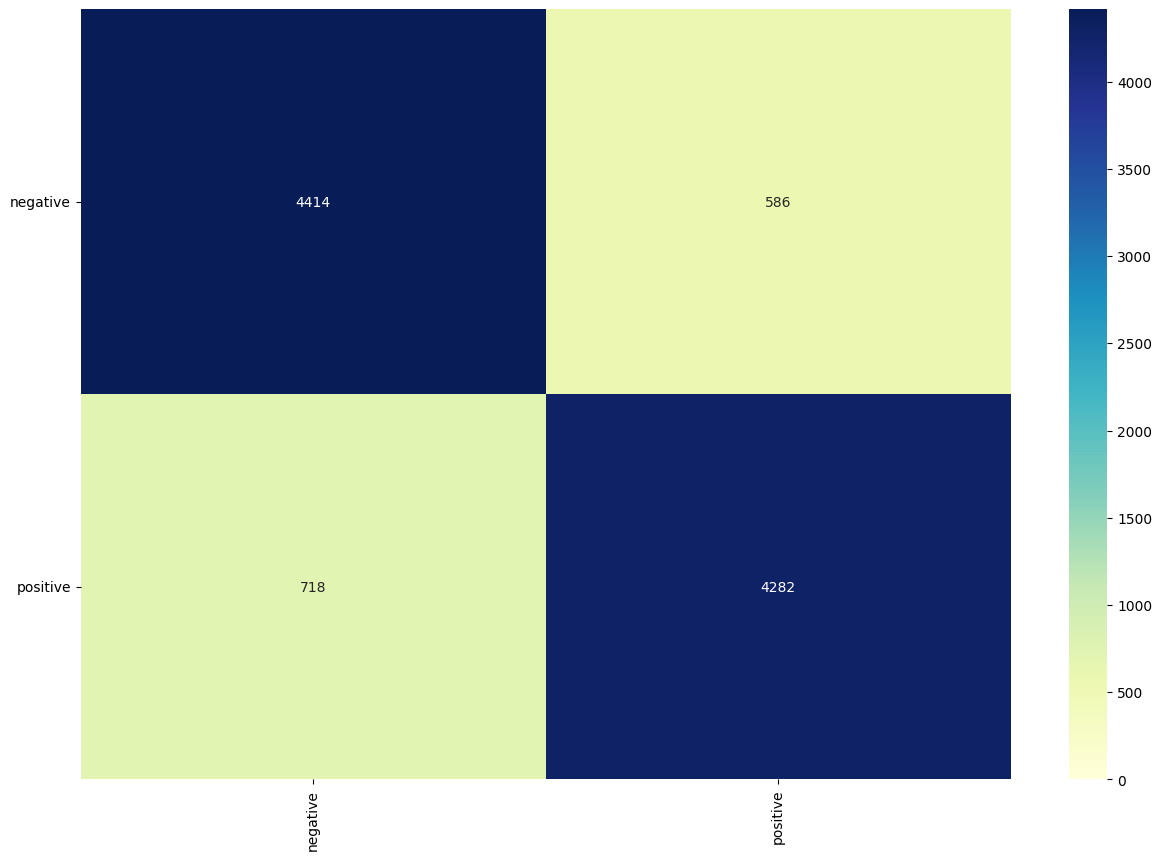

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test.values, preds)
conf_matrix_df = pd.DataFrame(conf_matrix, index=y_test.unique(), columns=y_test.unique())

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Podemos observar que se equivoca de vez en cuando al clasificar, vamos a ver un ejemplo de mala clasificación.

In [ ]:
clas = (preds != y_test.values)
clas

array([False,  True, False, ..., False, False,  True])

In [ ]:
print(y_test.values[1])
print(preds[1])

print(X_test.values[1])


negative
positive
enjoyed caraxs les amants du pont neuf therefore expecting film similar standard well first minutes ok disintegrates rather pretentious journey young man looking essence life sad disappointment


La razón por la que ha clasificado mal esta review es que aparecen palabras asociadas a reviews positivas aunque en realidad esta review no quiere usarlas con esa connotación. Para arreglarlo una solución es comprobar cada palabra en su contexto, para que pueda distinguirse a qué se refieren exactamente.